In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df = pd.read_excel("Real estate valuation data set.xlsx",index_col=0)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [74]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


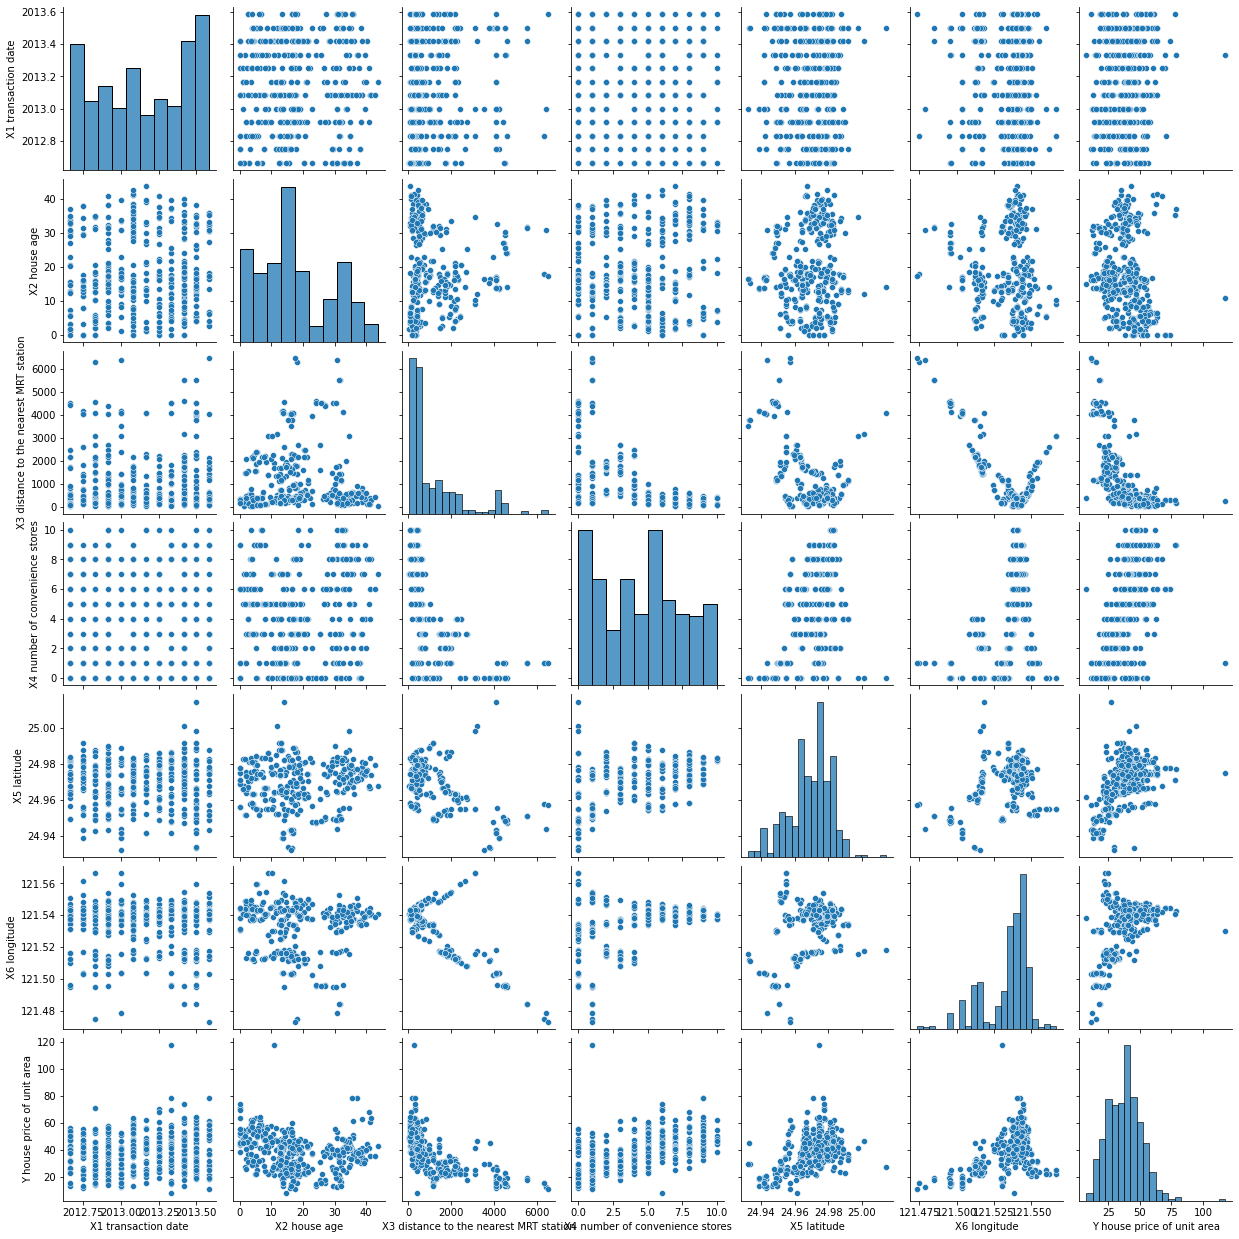

In [75]:
# Pairplot for numerical features
sns.pairplot(df, vars=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area'])
plt.show()

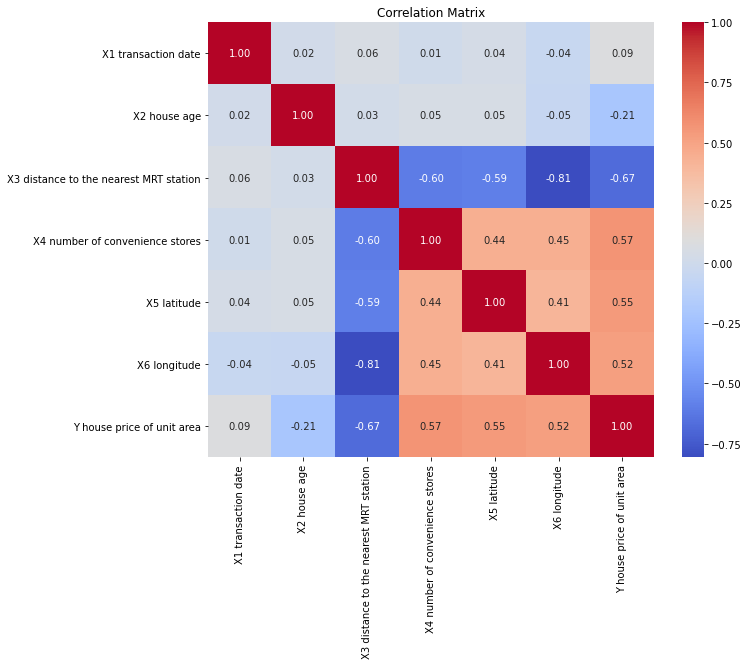

In [76]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

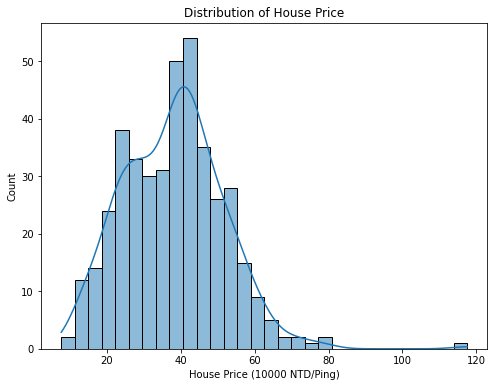

In [77]:
# Distribution of the target variable (house price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Y house price of unit area'], bins=30, kde=True)
plt.title('Distribution of House Price')
plt.xlabel('House Price (10000 NTD/Ping)')
plt.show()


Linear Regression:
Training MSE: 83.11097569290104
Testing MSE: 53.50225236118185

Support Vector Machine:
Training MSE: 98.77592071582485
Testing MSE: 67.22118865933321

Gradient Boosting:
Training MSE: 13.165498339945087
Testing MSE: 36.40498955645859

Random Forest:
Training MSE: 8.842337731465886
Testing MSE: 33.19788171632302

Neural Network:
Training MSE: 73.17750623842136
Testing MSE: 49.956478871062856


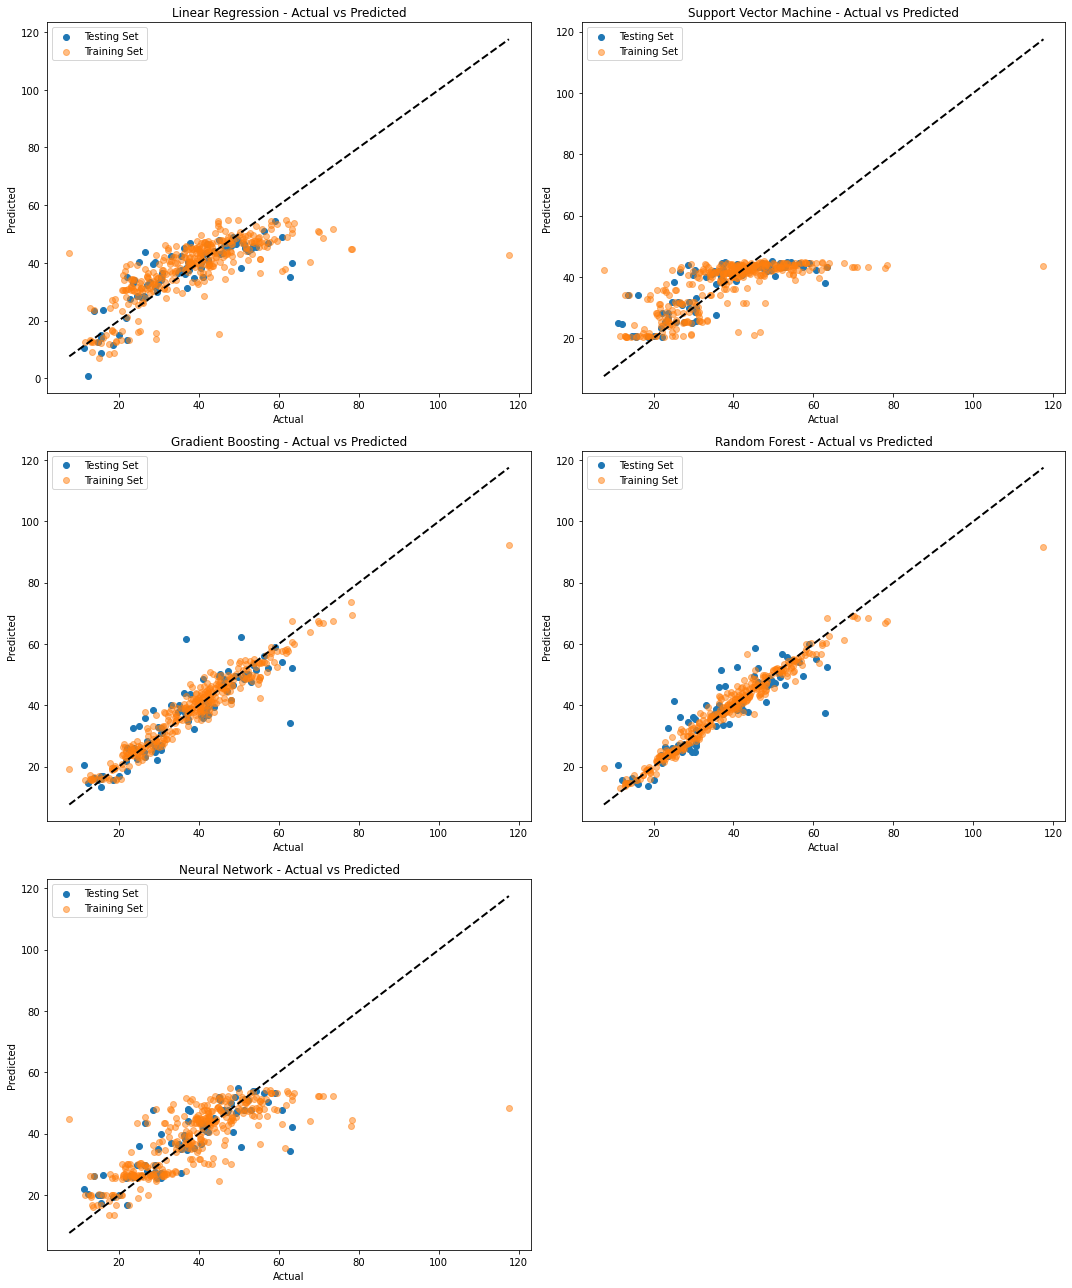

In [91]:
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.neural_network import MLPRegressor 

# Assuming X and Y are your features and target variable
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
Y = df['Y house price of unit area']


from sklearn.metrics import mean_squared_error

# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)  # Adjust parameters as needed
}

# Evaluate each model, plot actual vs predicted values, and check for overfitting/underfitting
plt.figure(figsize=(15, 18))

for model_name, model in models.items():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate Mean Squared Error for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Print training and testing errors
    print(f"\n{model_name}:")
    print("Training MSE:", train_mse)
    print("Testing MSE:", test_mse)

    # Plot actual vs predicted values for testing set
    plt.subplot(3, 2, list(models.keys()).index(model_name) + 1)
    plt.scatter(y_test, y_test_pred, label='Testing Set')
    plt.scatter(y_train, y_train_pred, label='Training Set', alpha=0.5)
    plt.plot([min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
             [min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
             '--k', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.legend()

plt.tight_layout()
plt.show()




In [79]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [80]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 500 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 500, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)



# Fit the random search model
rf_random.fit(X, Y);

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 24.1min finished


In [82]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [83]:
from sklearn.metrics import mean_squared_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mse = mean_squared_error(test_labels, predictions)
    
    print('Model Performance')
    print('Mean Squared Error (MSE): {:0.4f}'.format(mse))

    return mse


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [114]:
base_model = RandomForestRegressor()
base_model.fit(X_train,y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Mean Squared Error (MSE): 31.1439


In [106]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Mean Squared Error (MSE): 4.9998


In [98]:
best_random.feature_importances_

array([0.04625036, 0.14784035, 0.30367752, 0.11438058, 0.22322858,
       0.16462261])

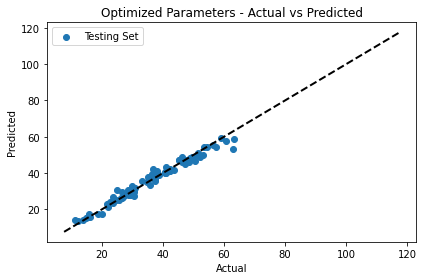

In [118]:
predictions = best_random.predict(X_test)
plt.scatter(y_test, predictions, label='Testing Set')

plt.plot([min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
            [min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
            '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Optimized Parameters - Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

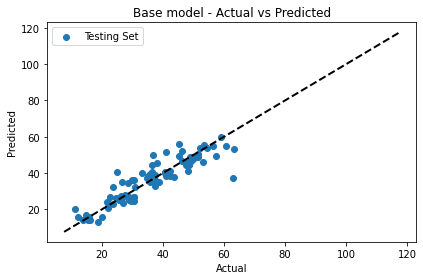

In [121]:
predictions = base_model.predict(X_test)
plt.scatter(y_test, predictions, label='Testing Set')


plt.plot([min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
            [min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
            '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Base model - Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()